In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
%load_ext autoreload
%autoreload 2

from simulator.load_data import load_md_from_file
from simulator.simulator import Sim
from simulator.strategy import StoikovStrategy, BestPosStrategy, FutureMidPriceStrategy


In [3]:
md = load_md_from_file(path='md/btcusdt_Binance_LinearPerpetual/', nrows=10 ** 5)
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

delay = pd.Timedelta(0.1, 's').delta
hold_time = pd.Timedelta(10, 's').delta

C:\Users\Rs63\AppData\Local\Temp\ipykernel_19356\437147249.py:2: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  latency = pd.Timedelta(10, 'ms').delta
C:\Users\Rs63\AppData\Local\Temp\ipykernel_19356\437147249.py:3: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  md_latency = pd.Timedelta(10, 'ms').delta
C:\Users\Rs63\AppData\Local\Temp\ipykernel_19356\437147249.py:5: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  delay = pd.Timedelta(0.1, 's').delta
C:\Users\Rs63\AppData\Local\Temp\ipykernel_19356\437147249.py:6: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  hold_time = pd.Timedelta(10, 's').delta


In [ ]:
gamma = 0.5
horizon_const = 1
intensity = 3

sim = Sim(md, latency, md_latency)
stoikov = StoikovStrategy(delay, gamma, horizon_const, intensity)
res = stoikov.run(sim)


In [ ]:
sim = Sim(md, latency, md_latency)
mid_price = BestPosStrategy(delay)
res = mid_price.run(sim)

In [ ]:
sim = Sim(md, latency, md_latency)
future = FutureMidPriceStrategy(delay)
res = future.run(sim)

Сравним графики PnL трех стратегий:

Text(0, 0.5, 'PNL')

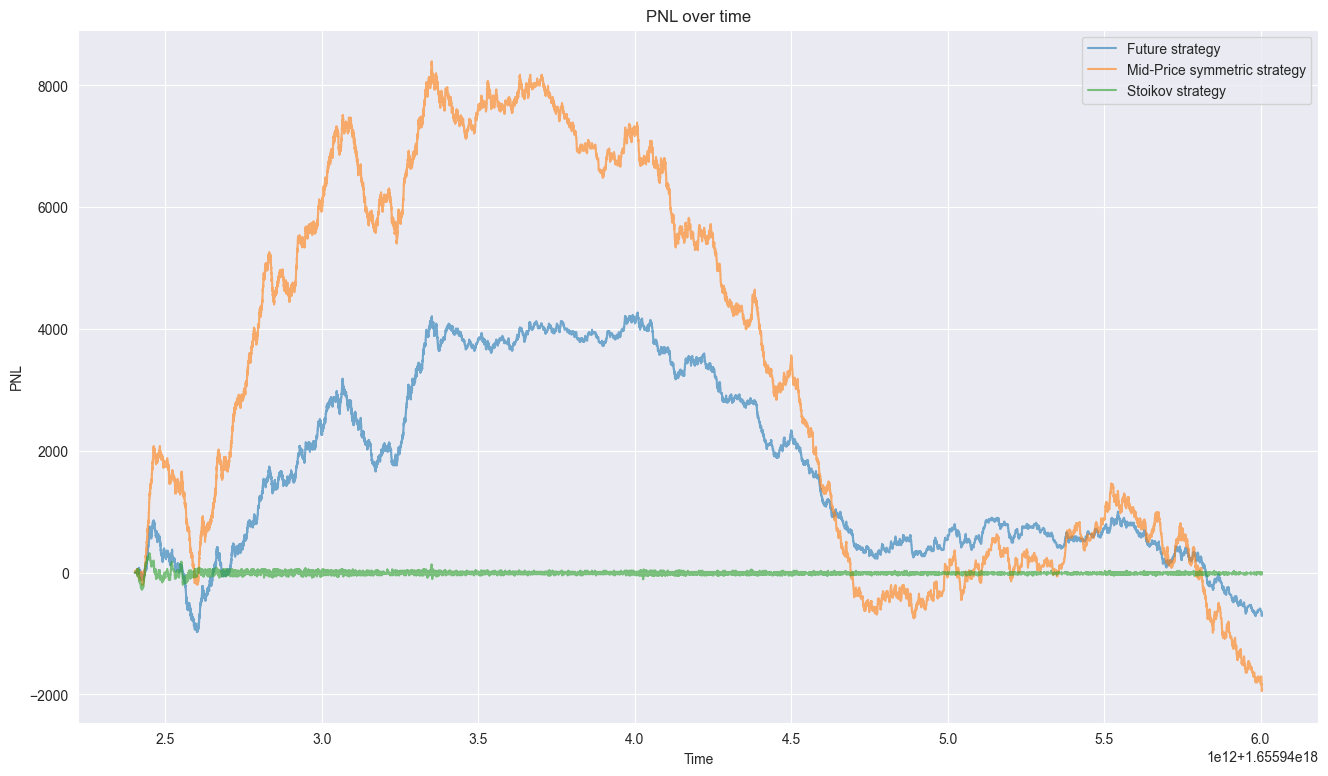

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 9))
plt.title('PNL over time')
plt.plot(future.history['time'], future.history['pnl'][1:-1], label='Future strategy', alpha=0.6)
plt.plot(mid_price.history['time'], mid_price.history['pnl'][1:], label='Mid-Price symmetric strategy',
         alpha=0.6)
plt.plot(stoikov.history['time'], stoikov.history['pnl'][1:], label='Stoikov strategy', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('PNL')

In [8]:
print('Средние значения PnL:\nStoikov strategy: {}\nMid-Price strategy: {}\nFuture strategy: {}'.format(np.mean(stoikov.history['pnl'][1:]), np.mean(mid_price.history['pnl'][1:]), np.mean(future.history['pnl'][1:])))

Средние значения PnL:
Stoikov strategy: -4.8581544510032115
Mid-Price strategy: 3786.817827198352
Future strategy: 1634.9329992945168


In [9]:
print('Стандартное отклонение PnL:\nStoikov strategy: {}\nMid-Price strategy: {}\nFuture strategy: {}'.format(np.std(stoikov.history['pnl'][1:]), np.std(mid_price.history['pnl'][1:]), np.std(future.history['pnl'][1:])))

Стандартное отклонение PnL:
Stoikov strategy: 41.17247063942637
Mid-Price strategy: 3026.7401906608993
Future strategy: 1503.4547696244222


Видим, что PnL у стратегии Стойкова в среднем ниже, чем у двух других стратегий, и находится около нуля почи всегда. При этом стандартное отклонение у стратегии Стойкова оказалось тоже гораздо ниже.

Сравним спреды стратегий:

Text(0.5, 1.0, 'Spreads')

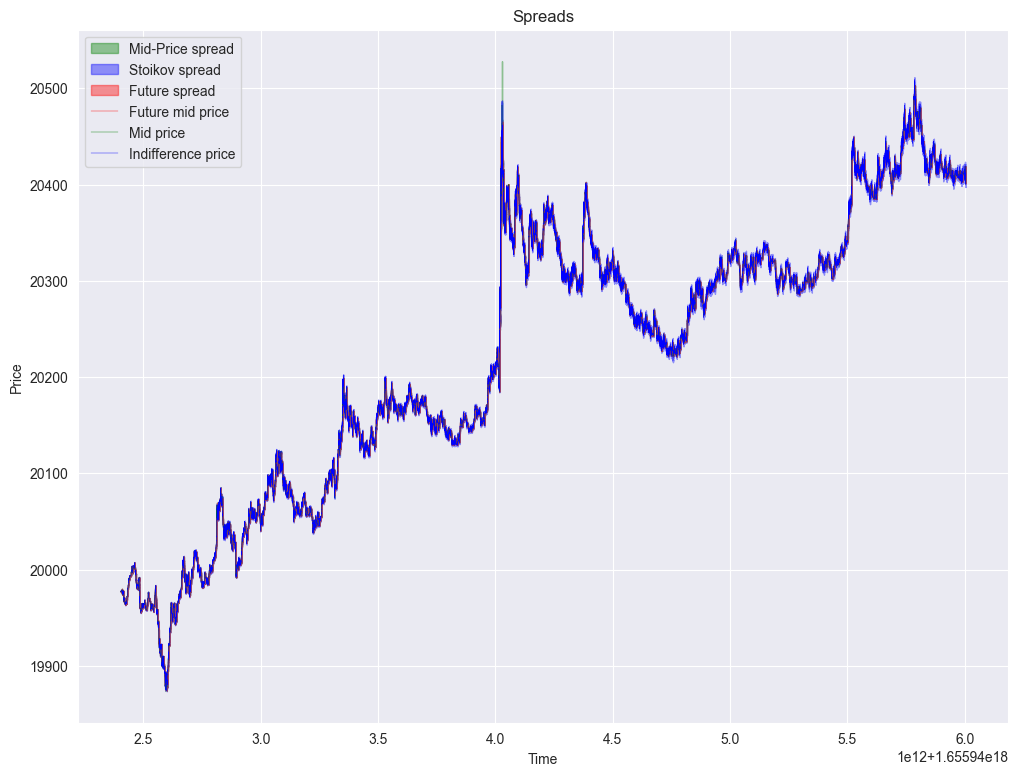

In [10]:
plt.figure(figsize=(12, 9))

plt.fill_between(mid_price.history['time'], mid_price.history['bid_price'],
                 mid_price.history['ask_price'], label='Mid-Price spread', alpha=0.4, color='green')
plt.fill_between(stoikov.history['time'], stoikov.history['bid_price'],
                 stoikov.history['ask_price'], label='Stoikov spread', alpha=0.4, color='blue')
plt.fill_between(future.history['time'], future.history['bid_price'], future.history['ask_price'],
                 label='Future spread', alpha=0.4, color='red')
plt.plot(future.history['time'], future.history['mid_price'], label='Future mid price',
         color='red', linewidth=0.3)
plt.plot(mid_price.history['time'], mid_price.history['mid_price'], label='Mid price',
         color='green', linewidth=0.3)
plt.plot(stoikov.history['time'], stoikov.history['mid_price'], label='Indifference price',
         color='blue', linewidth=0.3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Spreads')

In [11]:
stoikov_spread = np.array(stoikov.history['ask_price']) - np.array(stoikov.history['bid_price'])
mid_spread = np.array(mid_price.history['ask_price']) - np.array(mid_price.history['bid_price'])
future_spread = np.array(future.history['ask_price']) - np.array(future.history['bid_price'])

Text(0, 0.5, 'Spread')

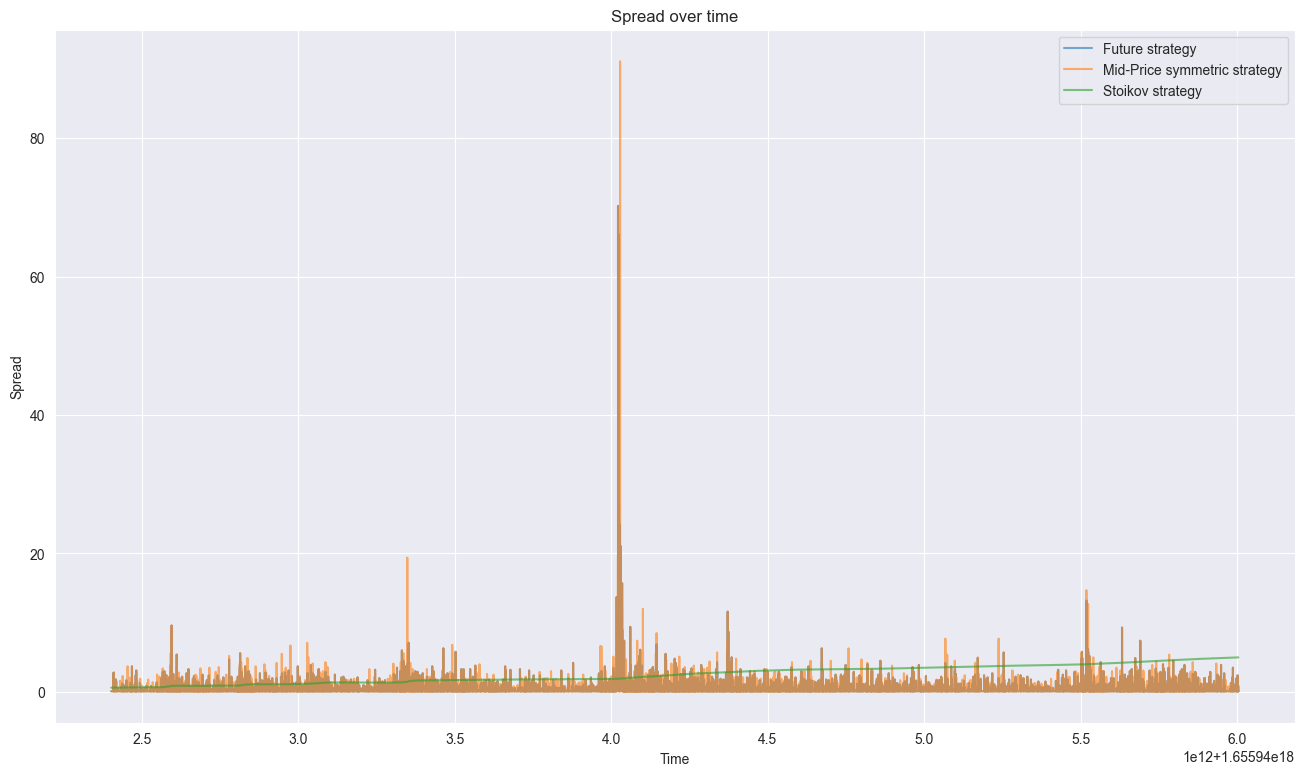

In [12]:
plt.figure(figsize=(16, 9))
plt.title('Spread over time')
plt.plot(future.history['time'], future_spread, label='Future strategy', alpha=0.6)
plt.plot(mid_price.history['time'], mid_spread, label='Mid-Price symmetric strategy',
         alpha=0.6)
plt.plot(stoikov.history['time'], stoikov_spread, label='Stoikov strategy', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Spread')

Спред у стратегии Стойкова растет с увеличением времени торговли

Сравним inventory стратегий в биткоинах:

Text(0, 0.5, 'Inventory')

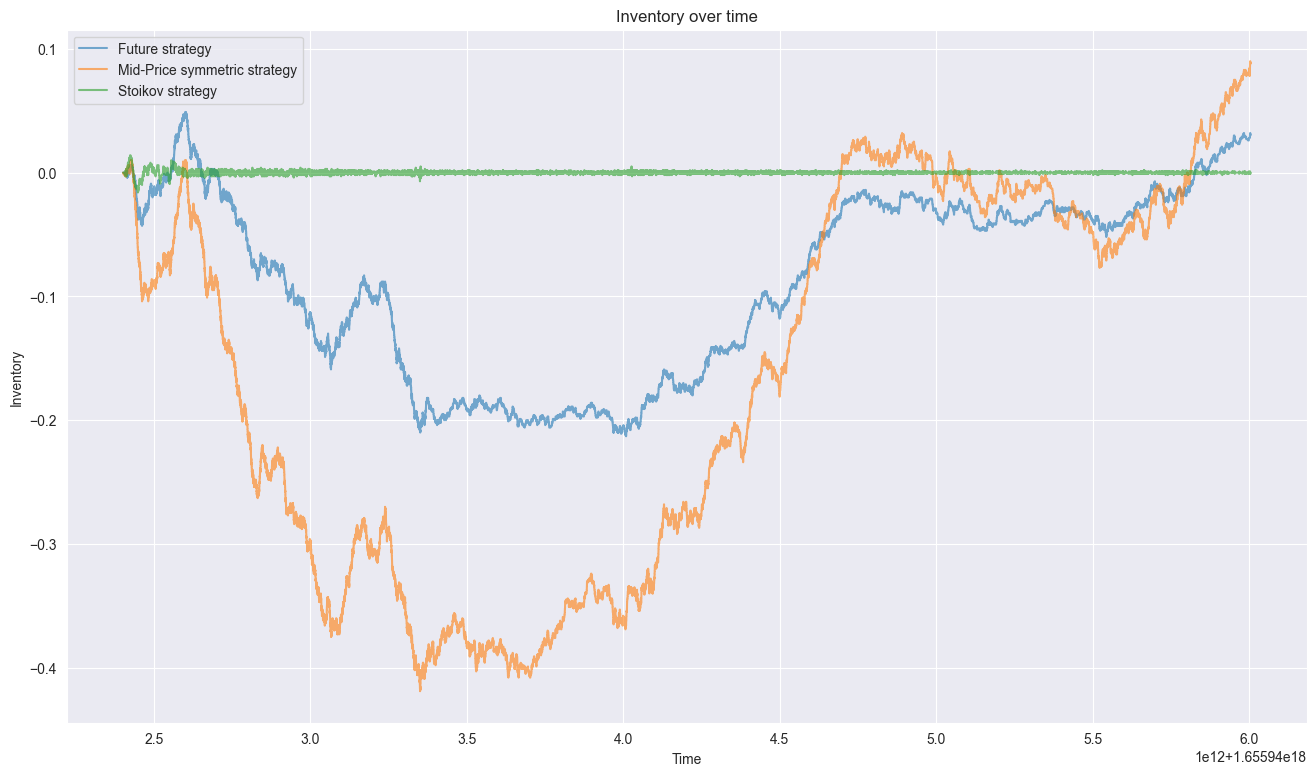

In [13]:
plt.figure(figsize=(16, 9))
plt.title('Inventory over time')
plt.plot(future.history['time'], future.history['inventory'], label='Future strategy', alpha=0.6)
plt.plot(mid_price.history['time'], mid_price.history['inventory'], label='Mid-Price symmetric strategy',
         alpha=0.6)
plt.plot(stoikov.history['time'], stoikov.history['inventory'], label='Stoikov strategy', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Inventory')

In [14]:
print('Стандартное отклонение Inventory:\nStoikov strategy: {}\nMid-Price strategy: {}\nFuture strategy: {}'.format(np.std(stoikov.history['inventory'][1:]), np.std(mid_price.history['inventory'][1:]), np.std(future.history['inventory'][1:])))

Стандартное отклонение Inventory:
Stoikov strategy: 0.00205821577085386
Mid-Price strategy: 0.1498382495866861
Future strategy: 0.07466244228991445


Дисперсия размера портфеля у стратегии Стойкова оказалась ниже, чем у других стратегий. Также по графикам можно увидеть, что значение inventory у стратегии Стойкова колеблется вблизи нуля в отличие от других стратегий.

Мы получили ожидаемые результаты: у стратегии Стойкова PnL ниже, но зато низкая дисперсия и позиция не сильно отклоняется от нуля.

Теперь сравним различные подходы для future strategy.

В первом подходе мы никак не пытаемся ликвидировать позицию.

In [32]:
sim = Sim(md, latency, md_latency)
no_liq = FutureMidPriceStrategy(delay, commission=-0.001)
res = no_liq.run(sim)

Во втором подходе из размеров bid и ask мы отнимаем 0.01% от текущего inventory.

In [33]:
sim = Sim(md, latency, md_latency)
pos_perc = FutureMidPriceStrategy(delay, commission=-0.001, position_strategy='cur_pos_percentage')
res = pos_perc.run(sim)

В третьем подходе мы домножаем размер bid на $e^{-current\_inventory}$, а размер ask на $e^{current\_inventory}$. Таким образом, при короткой позиции мы домножаем bid на число больше 1, а ask - на число меньше 1. При длинной позиции обратная ситуация.

In [34]:
sim = Sim(md, latency, md_latency)
exp_weights = FutureMidPriceStrategy(delay, commission=-0.001, position_strategy='exp_weights')
res = exp_weights.run(sim)

В четвертом подходе мы опять пользуемся текущим размером нашей позиции и устанавливаем некоторый интервал на позицию, вне которого мы будем стараться вернуться в интервал и выставлять веса у размеров ордеров равными $\frac{limit}{current\_inventory}$ и $\frac{current\_inventory}{limit}$.

In [39]:
sim = Sim(md, latency, md_latency)
cur_weights = FutureMidPriceStrategy(delay, commission=-0.001, position_strategy='сur_pos_weighted', position_interval=(-0.05, 0.05))
res = cur_weights.run(sim)

В пятом подходе мы устанавливаем интервал на позицию, вне которого мы торгуем только в одну сторону.

In [40]:
sim = Sim(md, latency, md_latency)
one_side = FutureMidPriceStrategy(delay, commission=-0.001, position_strategy='one_side', position_interval=(-0.1, 0.1))
res = one_side.run(sim)

Сравним PnL пяти стратегий:

Text(0, 0.5, 'PNL')

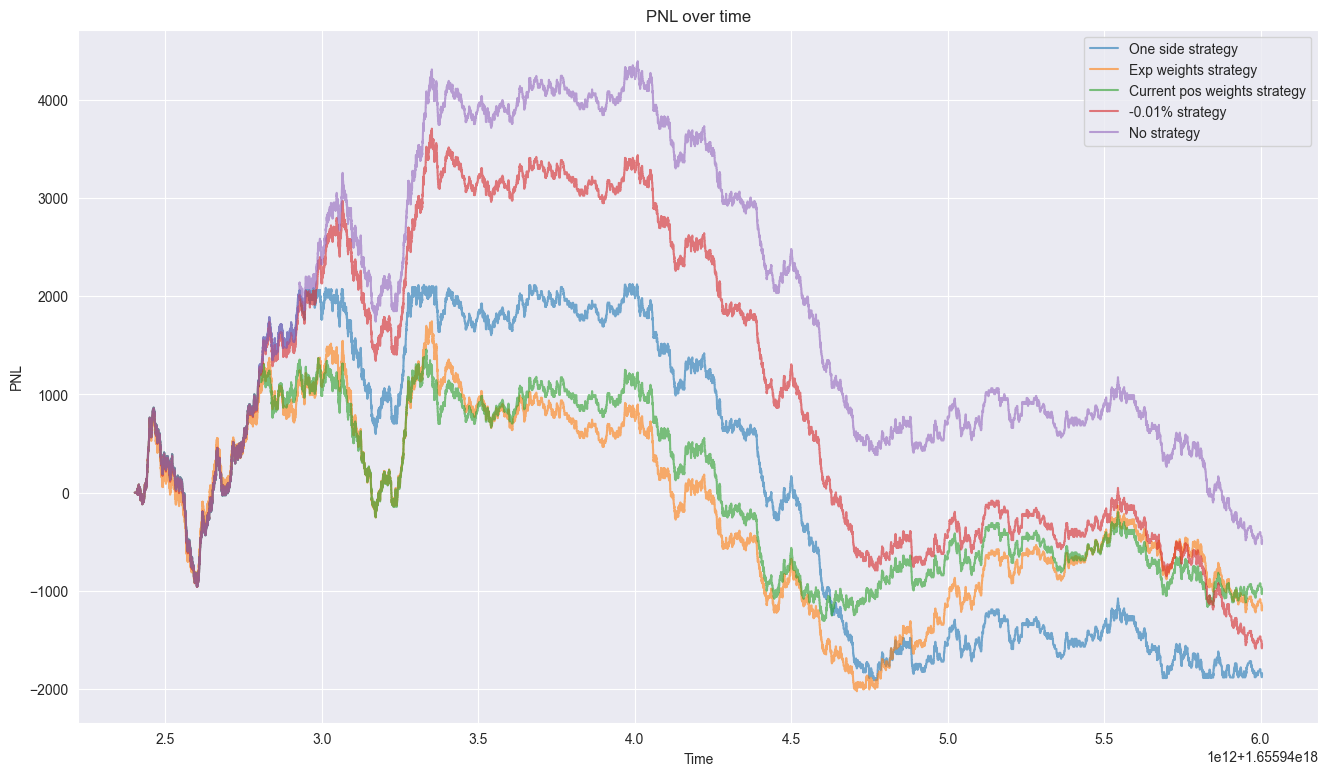

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 9))
plt.title('PNL over time')
plt.plot(one_side.history['time'], one_side.history['pnl'][1:-1], label='One side strategy', alpha=0.6)
plt.plot(exp_weights.history['time'], exp_weights.history['pnl'][1:-1], label='Exp weights strategy',
         alpha=0.6)
plt.plot(cur_weights.history['time'], cur_weights.history['pnl'][1:-1], label='Current pos weights strategy', alpha=0.6)

plt.plot(pos_perc.history['time'], pos_perc.history['pnl'][1:-1], label='-0.01% strategy',
         alpha=0.6)
plt.plot(no_liq.history['time'], no_liq.history['pnl'][1:-1], label='No strategy', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('PNL')

Сравним inventory пяти стратегий:

Text(0, 0.5, 'Inventory')

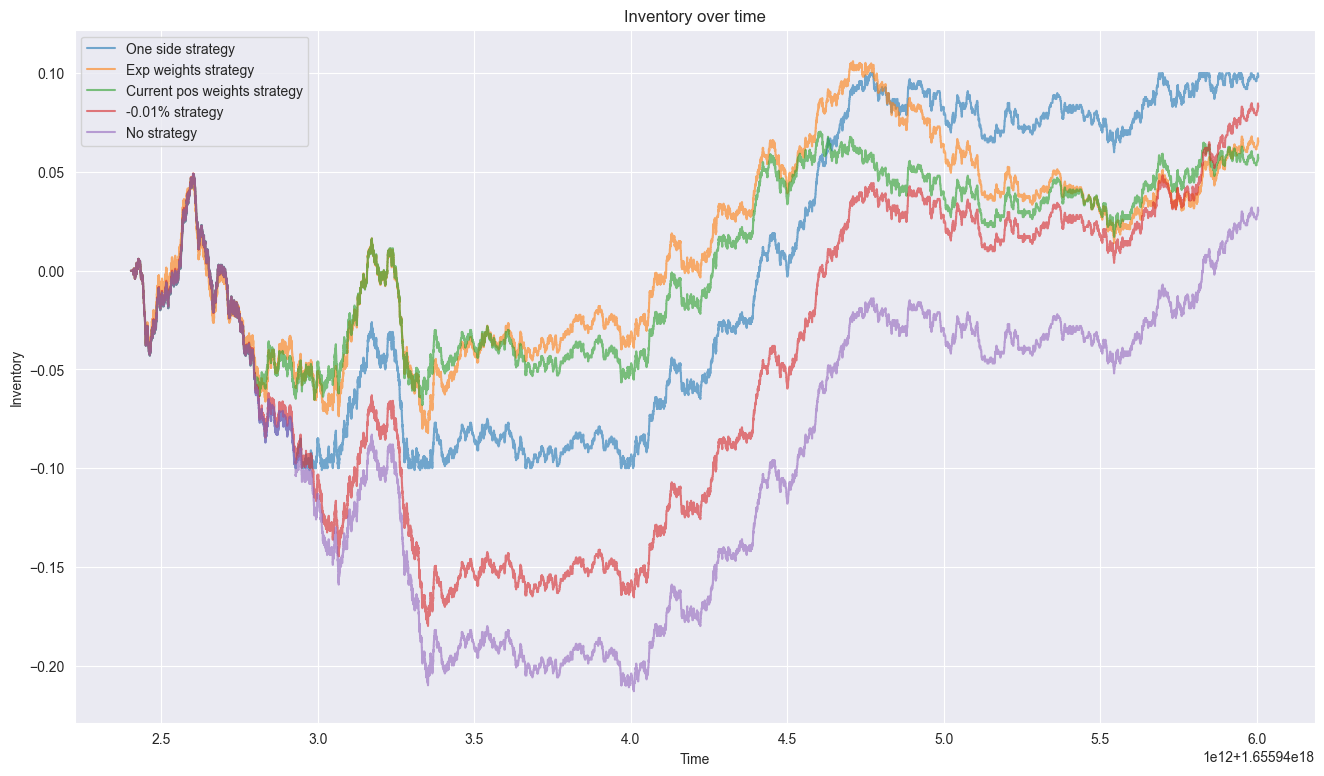

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 9))
plt.title('Inventory over time')
plt.plot(one_side.history['time'], one_side.history['inventory'], label='One side strategy', alpha=0.6)
plt.plot(exp_weights.history['time'], exp_weights.history['inventory'], label='Exp weights strategy',
         alpha=0.6)
plt.plot(cur_weights.history['time'], cur_weights.history['inventory'], label='Current pos weights strategy', alpha=0.6)

plt.plot(pos_perc.history['time'], pos_perc.history['inventory'], label='-0.01% strategy',
         alpha=0.6)
plt.plot(no_liq.history['time'], no_liq.history['inventory'], label='No strategy', alpha=0.6)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Inventory')

In [43]:
print('Стандартное отклонение Inventory:\nNo strategy: {}\nOne side strategy: {}\nExp weights strategy: {}\nCurrent position weights strategy: {}\n-0.01% strategy: {}'.format(np.std(no_liq.history['inventory'][1:]), np.std(one_side.history['inventory'][1:]), np.std(exp_weights.history['inventory'][1:]), np.std(cur_weights.history['inventory'][1:]), np.std(pos_perc.history['inventory'][1:])))

Стандартное отклонение Inventory:
No strategy: 0.07466244228991445
One side strategy: 0.06717336091658806
Exp weights strategy: 0.04661759457150496
Current position weights strategy: 0.04021975839129451
-0.01% strategy: 0.07262505969288229


Хоть итоговая позиция оказалось ближе всего у изначальной стратегии, мы видим, что у всех остальных стратегий меньше стандартное отклонение, что означает, что inventory фиксируется около какого-то значения и колеблется около него. Также в стратегиях, использующих интервалы для inventory, мы можем вручную контролировать значение inventory, что хорошо работает, как мы можем заметить на графиках.